In [1]:
# Data Wrangling libraries
import pandas as pd 
import numpy as np 
from scipy import stats 

# Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.ticker as ticker

# Machine Learning libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [2]:
base = pd.read_csv("Movies_new.csv")

In [47]:
base.describe()

,ID,Year,Rating,Vote Average,Vote Count,Runtime,Budget,Revenue,Profit
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.00000,276.000000,2.770000e+02,276.000000
mean,208317.862816,2008.137184,3.732852,3.639711,5623.187726,122.01444,0.161338,2.917754e+08,0.149132
std,180983.979584,14.994055,0.808091,0.320683,4561.736731,29.92018,0.184803,3.741417e+08,0.123653
min,24.000000,1940.000000,1.000000,2.100000,139.000000,81.00000,0.001417,5.638500e+04,0.041010
25%,9426.000000,2004.000000,3.000000,3.450000,2014.000000,105.00000,0.037745,4.666586e+07,0.068759
50%,263115.000000,2015.000000,4.000000,3.650000,4099.000000,118.00000,0.083433,1.518660e+08,0.105240
75%,346685.000000,2017.000000,4.000000,3.850000,8443.000000,133.00000,0.235257,3.635333e+08,0.171171
max,619264.000000,2020.000000,5.000000,4.350000,23392.000000,467.00000,1.000000,2.797801e+09,1.000000


Describe function show that the Budget and Revenue columns has 0 as a min values, however, the info() function showed that there isnt any NaN value

In [3]:
base.count()
base.isnull().sum()

ID              0
Movie           0
Year            0
Rating          0
Watched         0
Cinema          0
Vote Average    0
Vote Count      0
Runtime         0
Genres          0
Budget          0
Revenue         0
Overview        0
dtype: int64

This function replace all 0 value to NaN and then it is possible to fill this values with the median of the specific column

In [44]:
replace = base.replace(0, np.nan, inplace=True)
replace

AttributeError: 'NoneType' object has no attribute 'count'

In [5]:
budget_median = base.Budget.median()
revenue_median = base.Revenue.median()

In [6]:
base["Budget"].fillna(budget_median, inplace = True)
base["Revenue"].fillna(revenue_median, inplace = True)

In [7]:
base["Profit"] = base["Revenue"] - base["Budget"]
base.to_csv("Movies_profit.csv", index=False)

# Outliers

In [8]:
min_budget_thresold, max_budget_thresold = base.Budget.quantile([0.005, 0.995]) 
min_profit_thresold, max_profit_thresold = base.Budget.quantile([0.005, 0.995]) 

In [9]:
min_profit_thresold, max_profit_thresold = base.Budget.quantile([0.005, 0.995]) 
min_profit_thresold, max_profit_thresold

(847620.0, 300000000.0)

In [10]:
base[base["Budget"]< min_budget_thresold]
base[base["Budget"]> max_budget_thresold]

,ID,Movie,Year,Rating,Watched,Cinema,Vote Average,Vote Count,Runtime,Genres,Budget,Revenue,Overview,Profit
241,299534,Avengers: Endgame,2019,4,2019-04-21,False,4.15,14617,181,Adventure|SciFi|Action,356000000.0,2.797801e+09,After the devastating events of Avengers: Infi...,2.441801e+09


In [11]:
base[base["Profit"]< min_profit_thresold]
base[base["Profit"]> max_profit_thresold]

,ID,Movie,Year,Rating,Watched,Cinema,Vote Average,Vote Count,Runtime,Genres,Budget,Revenue,Overview,Profit
0,281957,The Revenant,2015,4,2016-01-01,False,3.75,13422,157,Western|Drama|Adventure,135000000.0,5.329505e+08,"In the 1820s, a frontiersman, Hugh Glass, sets...",3.979505e+08
19,293660,Deadpool,2016,5,2016-02-11,True,3.80,23392,108,Action|Adventure|Comedy,58000000.0,7.831000e+08,Deadpool tells the origin story of former Spec...,7.251000e+08
26,85,Raiders of Lost Ark,1981,5,2016-02-27,False,3.95,8236,115,Adventure|Action,18000000.0,3.899260e+08,When Dr. Indiana Jones – the tweed-suited prof...,3.719260e+08
30,87,Indiana Jones and the Temple of Doom,1984,4,2016-03-04,False,3.65,6056,118,Adventure|Action,28000000.0,3.330000e+08,"After arriving in India, Indiana Jones is aske...",3.050000e+08
35,209112,Batman v Superman: Dawn of Justice,2016,3,2016-03-24,True,2.95,13735,151,Action|Adventure|Fantasy,250000000.0,8.736349e+08,Fearing the actions of a god-like Super Hero l...,6.236349e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,474350,It Chapter Two,2019,3,2019-09-07,True,3.45,4647,169,Horror|Fantasy,79000000.0,4.730932e+08,27 years after overcoming the malevolent super...,3.940932e+08
247,475557,Joker,2019,5,2019-10-01,True,4.10,14328,122,Crime|Thriller|Drama,55000000.0,1.074251e+09,"During the 1980s, a failed stand-up comedian i...",1.019251e+09
252,181812,Star Wars: The Rise of Skywalker,2019,3,2019-12-26,True,3.30,5447,142,Action|Adventure|SciFi,250000000.0,1.074144e+09,The surviving Resistance faces the First Order...,8.241442e+08
271,105,Back To The Future,1985,4,2020-04-19,False,4.15,13660,116,Adventure|Comedy|SciFi|Family,19000000.0,3.811098e+08,Eighties teenager Marty McFly is accidentally ...,3.621098e+08


In [12]:
base_outliers = base[(base.Budget < max_budget_thresold) & (base.Budget > min_budget_thresold) & (base.Profit < max_profit_thresold) &  (base.Profit > min_profit_thresold) ]

In [13]:
base_outliers

,ID,Movie,Year,Rating,Watched,Cinema,Vote Average,Vote Count,Runtime,Genres,Budget,Revenue,Overview,Profit
1,273248,The Hateful 8,2015,5,2016-01-02,True,3.85,10124,188,Crime|Drama|Mystery|Western,44000000.0,155760117.0,Bounty hunters seek shelter from a raging bliz...,111760117.0
2,9741,Unbreakable,2000,3,2016-01-03,False,3.55,6409,106,Thriller|Drama|Mystery,75000000.0,248118121.0,An ordinary man makes an extraordinary discove...,173118121.0
3,141,Donnie Darko,2001,4,2016-01-03,False,3.90,8450,114,Fantasy|Drama|Mystery,6000000.0,6979093.0,"After narrowly escaping a bizarre accident, a ...",979093.0
4,24,Kill Bill vol. 1,2003,4,2016-01-03,False,4.00,12110,111,Action|Crime,30000000.0,180899045.0,"An assassin is shot by her ruthless employer, ...",150899045.0
5,312221,Creed,2015,4,2016-01-03,False,3.70,4938,133,Drama,37000000.0,173567581.0,The former World Heavyweight Champion Rocky Ba...,136567581.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,595,To Kill a Mockingbird,1962,3,2020-04-12,False,4.00,1644,130,Crime|Drama,2000000.0,13129846.0,"Scout Finch, 6, and her older brother Jem live...",11129846.0
272,446159,Bacurau,2019,4,2020-04-25,False,4.05,522,132,Mystery|Western|Thriller,30000000.0,151866047.5,"Bacurau, a small town in the Brazilian sertão,...",121866047.5
273,331482,Little Women,2019,4,2020-05-01,False,4.00,2728,135,Drama|Romance,40000000.0,191540586.0,Four sisters come of age in America in the aft...,151540586.0
275,324857,Spider-Man: Into the Spider-Verse,2018,5,2020-05-09,False,4.20,7801,117,Action|Adventure|Animation|SciFi|Comedy,90000000.0,375540831.0,Miles Morales is juggling his life between bei...,285540831.0


# Graph Analysis

# Boxplot comparing user rating and movies database average ratings

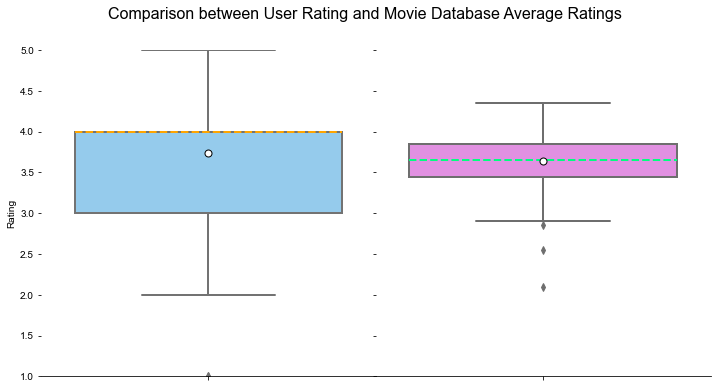

In [14]:
fig, axs = plt.subplots(ncols=2, figsize = (12,6), sharey=True)
fig.suptitle("Comparison between User Rating and Movie Database Average Ratings", fontsize=16)
plt.subplots_adjust(wspace=0, hspace=0)
plt.ylim(1,5)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})
sns.despine(left= True)
sns.set_style("whitegrid")



user_boxplot = sns.boxplot(y = base["Rating"], 
                            color="lightskyblue", 
                            showmeans=True, 
                            meanprops= {"marker":"o",
                                        "markerfacecolor":"white", 
                                        "markeredgecolor":"black", 
                                        "markersize":"7"},
                            medianprops = {"color":"orange", 
                                           "linestyle":"--"}, 
                            ax=axs[0])


database_boxplot = sns.boxplot(y = base["Vote Average"], 
                           color="violet", 
                           showmeans=True,
                           meanprops= {"marker":"o",
                                       "markerfacecolor":"white", 
                                       "markeredgecolor":"black", 
                                       "markersize":"7"},
                           medianprops = {"color":"springgreen", 
                                          "linestyle":"--"},
                           ax=axs[1]).set(ylabel=None)

plt.savefig("Graphs/Boxplot_Ratings")

# Transform the genres in a Series of genres and  Genres x Rating x Vote Average

In [15]:
df_genres_id= pd.Series(base["Genres"].values, index = base["ID"], name = "Genres")
split_genres = df_genres_id.str.split("|", expand = False)
genres_explode = split_genres.explode()

genres_explode

ID
281957      Western
281957        Drama
281957    Adventure
273248        Crime
273248        Drama
            ...    
324857        SciFi
324857       Comedy
530385       Horror
530385        Drama
530385      Mystery
Name: Genres, Length: 768, dtype: object

In [16]:
df_genres = genres_explode.to_frame()
df_genres.reset_index(level=0, inplace=True)
genres_count = genres_explode.value_counts()

genres_unique = df_genres["Genres"].unique()


In [17]:
merge_data = df_genres.merge(base[['ID','Rating', 'Vote Average']], 
           on = "ID",
           how='left')   
by_genres = merge_data.groupby("Genres")   

In [18]:
merge_data
merge_data.to_csv("Merge Data.csv", index=False)

<Figure size 432x288 with 0 Axes>

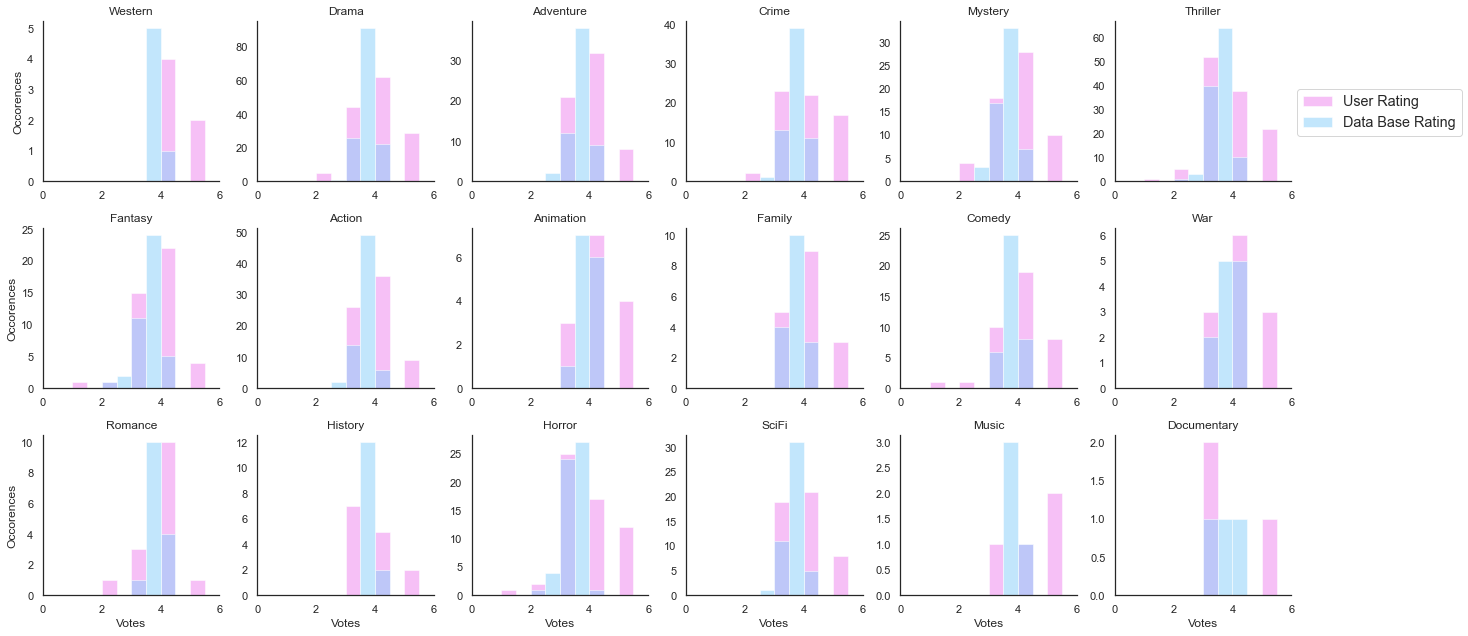

In [19]:
sns.set(style='white')
sns.despine(right=True, left=True)


bins = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5]

g = sns.FacetGrid(merge_data, col = "Genres", col_wrap= 6, sharex= False, sharey= False)
g = g.map(plt.hist, "Rating", color = "violet", bins = bins, alpha = 0.5)
g = g.map(plt.hist, "Vote Average", color = "lightskyblue", bins = bins, alpha = 0.5)

g.set(xlim=(0, 6))
g.set_titles("{col_name}")
g.set_axis_labels("Votes", "Occorences")


plt.legend(loc='upper center', labels=['User Rating', 'Data Base Rating'], bbox_to_anchor=(1.5, 3.2), fontsize = "large")

In [20]:
merge_data.Genres.value_counts()

Drama          140
Thriller       118
Action          71
Crime           64
Adventure       61
Mystery         60
Horror          57
SciFi           48
Fantasy         43
Comedy          39
Family          17
Romance         15
Animation       14
History         14
War             12
Western          6
Music            4
Documentary      3
Name: Genres, dtype: int64

In [21]:
genres_unique

array(['Western', 'Drama', 'Adventure', 'Crime', 'Mystery', 'Thriller',
       'Fantasy', 'Action', 'Animation', 'Family', 'Comedy', 'War',
       'Romance', 'History', 'Horror', 'SciFi', 'Music', 'Documentary'],
      dtype=object)

# Year x Rating

* Deixar esse gráfico legal - decidir se vou realmente usar
* Arrumar o hue
* Tentar colocar uma colorbar somente nos valores de vote average relacionando com vote count

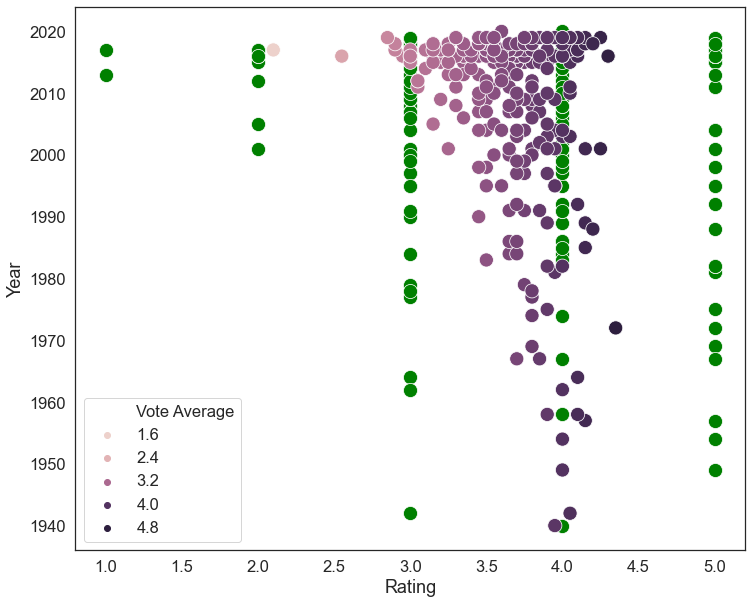

In [22]:
sns.set(rc={"figure.figsize": (12,10)},font_scale=1.5)
sns.set_style("white")


user_ratings= sns.scatterplot(x = base["Rating"], 
                y = base["Year"],
                s = 200,
                color = "green"
                )

database_rating = sns.scatterplot(x = base["Vote Average"], 
                y = base["Year"],
                s = 200,
                hue = base["Vote Average"]
                )

#cbar = plt.colorbar(database_rating) 

user_ratings.set(xlabel='Rating', ylabel='Year')

plt.savefig("Graphs/Year_Rating")

# WordCloud dos generos

In [23]:
all_genres = " ".join(s for s in genres_explode).strip()

all_genres

'Western Drama Adventure Crime Drama Mystery Western Thriller Drama Mystery Fantasy Drama Mystery Action Crime Drama Crime Thriller Action Crime Thriller Animation Family Fantasy Drama Comedy War Drama Romance Drama Thriller Comedy Drama Crime Thriller Drama Mystery Crime Drama Crime Action Thriller Drama Thriller History Crime Drama Thriller Action Adventure Comedy Drama Thriller Western Drama Crime Crime Drama Mystery Crime Drama Thriller Thriller Mystery Drama Crime Mystery Thriller Adventure Action Action Drama History War Crime Drama Mystery Crime Thriller Adventure Action Horror Mystery Thriller Mystery Horror Drama Drama Thriller Comedy Action Adventure Fantasy Drama SciFi Thriller Crime Drama Thriller Crime Mystery Crime Drama Mystery Thriller SciFi Drama Horror Crime Thriller Drama Mystery Adventure Drama Family Fantasy Horror Thriller Adventure Action SciFi Adventure Action Fantasy Horror Action Drama Drama Thriller Mystery Action Drama Crime Thriller Horror Drama Fantasy Mys

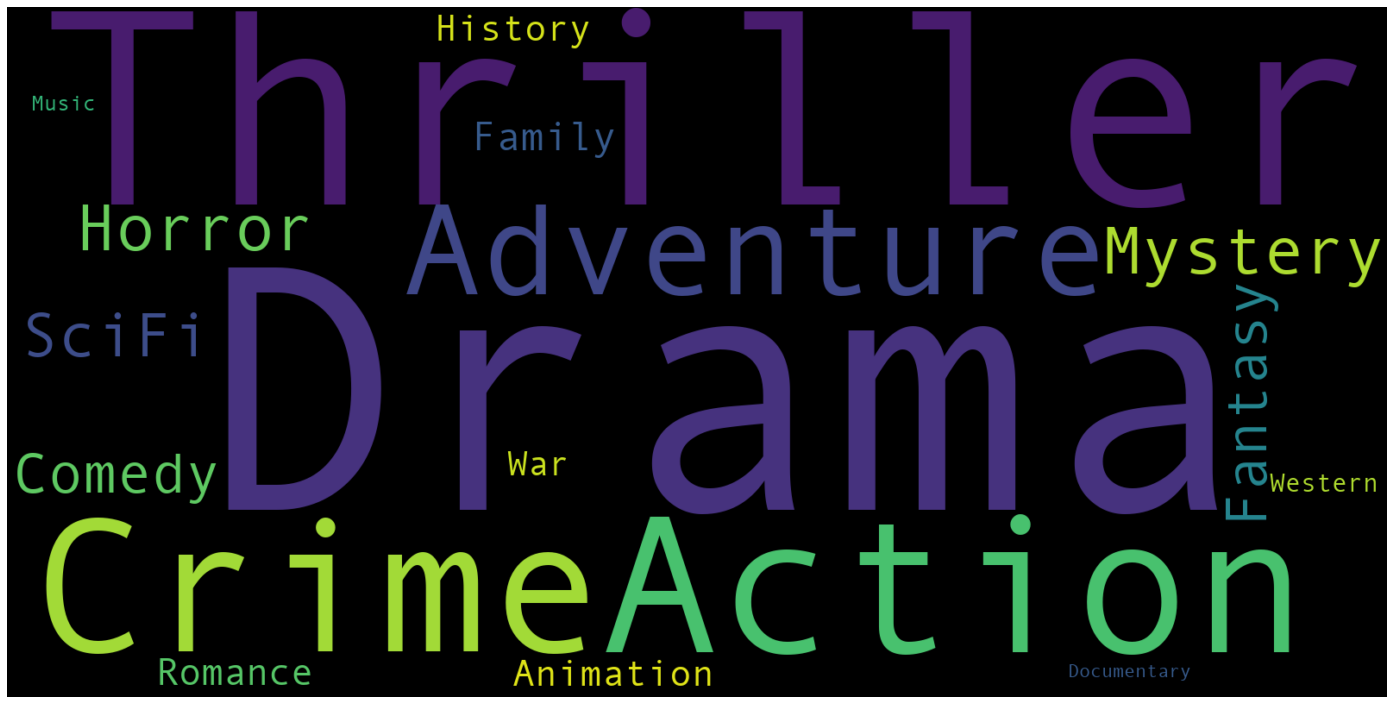

In [24]:
all_genres = " ".join(s for s in genres_explode)


wordcloud = WordCloud(background_color="black",
                      font_path='Andale Mono',
                      width=1600, height=800,
                      collocations=False,
                      colormap = "viridis").generate(all_genres)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis("off")

plt.savefig("Graphs/WordCloud")

In [25]:
wordcloud.words_

{'Drama': 1.0,
 'Thriller': 0.8142857142857143,
 'Action': 0.4928571428571429,
 'Crime': 0.45714285714285713,
 'Adventure': 0.42142857142857143,
 'Mystery': 0.4,
 'Horror': 0.37857142857142856,
 'SciFi': 0.34285714285714286,
 'Fantasy': 0.29285714285714287,
 'Comedy': 0.2785714285714286,
 'Family': 0.12142857142857143,
 'Romance': 0.10714285714285714,
 'Animation': 0.1,
 'History': 0.1,
 'War': 0.08571428571428572,
 'Western': 0.04285714285714286,
 'Music': 0.02857142857142857,
 'Documentary': 0.02142857142857143}

Provavelmente não vou usar esse gráfico

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text major ticklabel objects>)

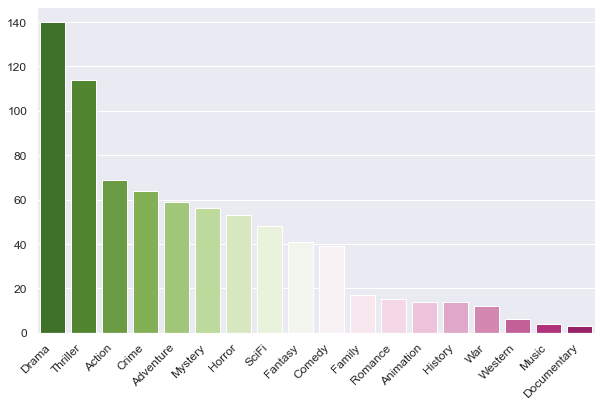

In [26]:
palette = sns.color_palette("PiYG_r", 18)
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2})
sns.set(rc={'figure.figsize':(10,6)})


barplot = sns.barplot(genres_count.index,
                      genres_count.values,
                      palette = palette
                      )

plt.xticks(rotation=45, fontsize=12, ha = "right")
plt.yticks(fontsize=12)

# Top 10 voted movies

In [27]:
vote_count = base.sort_values("Vote Count", ascending= False)
top_voted = vote_count.head(n =10)

top_voted

,ID,Movie,Year,Rating,Watched,Cinema,Vote Average,Vote Count,Runtime,Genres,Budget,Revenue,Overview,Profit
19,293660,Deadpool,2016,5,2016-02-11,True,3.80,23392,108,Action|Adventure|Comedy,58000000.0,7.831000e+08,Deadpool tells the origin story of former Spec...,7.251000e+08
198,299536,Avengers: Infinity War,2018,4,2018-04-22,True,4.15,19334,149,Adventure|Action|SciFi,300000000.0,2.046240e+09,As the Avengers and their allies have continue...,1.746240e+09
110,671,Harry Potter and the Sorcerer's Stone,2001,4,2016-11-13,False,3.95,17778,152,Adventure|Fantasy|Family,125000000.0,9.764756e+08,Harry Potter has lived under the stairs at his...,8.514756e+08
148,120,The Lord of the Rings: The Fellowship of the Ring,2001,4,2017-06-18,False,4.15,17572,178,Adventure|Fantasy|Action,93000000.0,8.713684e+08,"Young hobbit Frodo Baggins, after inheriting a...",7.783684e+08
45,271110,Captain America 3: Civil War,2016,4,2016-04-28,True,3.70,16640,147,Adventure|Action|SciFi,250000000.0,1.153296e+09,"Following the events of Age of Ultron, the col...",9.032963e+08
85,297761,Suicide Squad,2016,3,2016-08-05,True,2.95,15987,123,Action|Adventure|Crime|Fantasy|SciFi,175000000.0,7.468469e+08,"From DC Comics comes the Suicide Squad, an ant...",5.718469e+08
188,284054,Black Panther,2018,3,2018-03-13,True,3.70,15633,134,Action|Adventure|Fantasy|SciFi,200000000.0,1.346739e+09,King T'Challa returns home from America to the...,1.146739e+09
106,284052,Doctor Strange,2016,4,2016-11-03,True,3.70,15559,115,Action|Adventure|Fantasy|SciFi,165000000.0,6.777000e+08,"After his career is destroyed, a brilliant but...",5.127000e+08
141,283995,Guardians of the Galaxy Vol. 2,2017,4,2017-05-01,True,3.80,15265,137,Action|Adventure|Comedy|SciFi,200000000.0,8.637561e+08,The Guardians must fight to keep their newfoun...,6.637561e+08
180,297762,Wonder,2017,4,2018-01-02,True,3.65,15061,141,Action|Adventure|Fantasy,149000000.0,8.218470e+08,An Amazon princess comes to the world of Man i...,6.728470e+08


In [28]:
palette = sns.color_palette("Purples_r", 10)
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2})
sns.set(rc={'figure.figsize':(10,6)})


barplot = sns.barplot(x= top_voted["Vote Count"],
                      y = top_voted["Movie"], 
                      palette = palette,
                      orient = "h").set(ylabel = None)

plt.xticks(rotation=45, fontsize=12, ha = "center")
plt.yticks(fontsize=12)

plt.savefig(plt.savefig("Graphs/Top Voted Movies"), bbox_inches='tight')

ValueError: fname must be a PathLike or file handle

# Top 10 rated movies

In [29]:
vote = base.sort_values("Vote Average", ascending= False)
top_rated = vote.head(n =10)

top_rated

,ID,Movie,Year,Rating,Watched,Cinema,Vote Average,Vote Count,Runtime,Genres,Budget,Revenue,Overview,Profit
168,238,The Godfather,1972,5,2017-09-17,False,4.35,12781,175,Drama|Crime,6000000.0,245066411.0,"Spanning the years 1945 to 1955, a chronicle o...",239066411.0
134,377462,O.J.: Made in America,2016,5,2017-03-18,False,4.30,139,467,Documentary,30000000.0,151866047.5,A chronicle of the rise and fall of O.J. Simps...,121866047.5
160,372058,Your Name,2016,4,2017-08-12,False,4.30,6194,106,Romance|Animation|Drama,30000000.0,357986087.0,High schoolers Mitsuha and Taki are complete s...,327986087.0
8,129,Spirited Away,2001,3,2016-01-05,False,4.25,9961,125,Animation|Family|Fantasy,19000000.0,274925095.0,"A young girl, Chihiro, becomes trapped in a st...",255925095.0
253,496243,Parasite,2019,4,2020-01-01,False,4.25,8809,133,Comedy|Thriller|Drama,11363000.0,245924070.0,"All unemployed, Ki-taek's family takes peculia...",234561070.0
159,12477,Grave of the Fireflies,1988,5,2017-08-11,False,4.20,2939,89,Animation|Drama|War,3700000.0,151866047.5,"In the final months of World War II, 14-year-o...",148166047.5
275,324857,Spider-Man: Into the Spider-Verse,2018,5,2020-05-09,False,4.20,7801,117,Action|Adventure|Animation|SciFi|Comedy,90000000.0,375540831.0,Miles Morales is juggling his life between bei...,285540831.0
148,120,The Lord of the Rings: The Fellowship of the Ring,2001,4,2017-06-18,False,4.15,17572,178,Adventure|Fantasy|Action,93000000.0,871368364.0,"Young hobbit Frodo Baggins, after inheriting a...",778368364.0
238,490132,Green Book,2018,4,2019-03-10,False,4.15,6718,130,Drama|Comedy,23000000.0,319700000.0,"Tony Lip, a bouncer in 1962, is hired to drive...",296700000.0
74,207,Dead Poets Society,1989,4,2016-07-03,False,4.15,7309,128,Drama,16400000.0,235860116.0,"At an elite, old-fashioned boarding school in ...",219460116.0


# Linear regression between Budget and Profit

* Trying to discover if it is possible to predict the Profit by the Revenue - any relationship

In [30]:
base.corr()

,ID,Year,Rating,Cinema,Vote Average,Vote Count,Runtime,Budget,Revenue,Profit
ID,1.000000,0.669503,-0.097527,0.292603,-0.192863,0.079926,0.030513,0.062393,0.104093,0.108600
Year,0.669503,1.000000,-0.173690,0.271766,-0.345911,0.218559,0.104316,0.293394,0.252500,0.234347
Rating,-0.097527,-0.173690,1.000000,0.063873,0.510866,0.247778,0.141772,-0.017156,0.109069,0.130691
Cinema,0.292603,0.271766,0.063873,1.000000,-0.112638,0.418657,0.069756,0.485059,0.461351,0.438628
Vote Average,-0.192863,-0.345911,0.510866,-0.112638,1.000000,0.264723,0.267141,-0.021862,0.122127,0.146880
Vote Count,0.079926,0.218559,0.247778,0.418657,0.264723,1.000000,0.141165,0.622179,0.738489,0.733702
Runtime,0.030513,0.104316,0.141772,0.069756,0.267141,0.141165,1.000000,0.265686,0.216584,0.198141
Budget,0.062393,0.293394,-0.017156,0.485059,-0.021862,0.622179,0.265686,1.000000,0.840923,0.775781
Revenue,0.104093,0.252500,0.109069,0.461351,0.122127,0.738489,0.216584,0.840923,1.000000,0.993842
Profit,0.108600,0.234347,0.130691,0.438628,0.146880,0.733702,0.198141,0.775781,0.993842,1.000000


In [31]:
max_thresold = base["Budget"].quantile(0.95)
min_thresold = base["Budget"].quantile(0.05)

In [32]:
max_thresold


200000000.0

In [33]:
base.sort_values("Profit", ascending= False).head(10)

,ID,Movie,Year,Rating,Watched,Cinema,Vote Average,Vote Count,Runtime,Genres,Budget,Revenue,Overview,Profit
241,299534,Avengers: Endgame,2019,4,2019-04-21,False,4.15,14617,181,Adventure|SciFi|Action,356000000.0,2.797801e+09,After the devastating events of Avengers: Infi...,2.441801e+09
198,299536,Avengers: Infinity War,2018,4,2018-04-22,True,4.15,19334,149,Adventure|Action|SciFi,300000000.0,2.046240e+09,As the Avengers and their allies have continue...,1.746240e+09
119,12445,Harry Potter and the Deathly Hallows Part II,2011,5,2016-12-18,False,4.05,14190,130,Fantasy|Adventure,125000000.0,1.341511e+09,"Harry, Ron and Hermione continue their quest t...",1.216511e+09
188,284054,Black Panther,2018,3,2018-03-13,True,3.70,15633,134,Action|Adventure|Fantasy|SciFi,200000000.0,1.346739e+09,King T'Challa returns home from America to the...,1.146739e+09
228,351286,Jurassic World: Fallen Kingdom,2018,3,2018-10-28,False,3.25,7953,129,Action|Adventure|SciFi,170000000.0,1.303460e+09,Three years after the demise of Jurassic World...,1.133460e+09
179,181808,Star Wars: Episode VIII The Last Jedi,2017,4,2017-12-26,True,3.50,10896,152,SciFi|Action|Adventure,200000000.0,1.332540e+09,Rey develops her newly discovered abilities wi...,1.132540e+09
208,260513,Incredibles 2,2018,5,2018-06-28,True,3.80,8953,118,Action|Adventure|Animation|Family,200000000.0,1.242805e+09,Elastigirl springs into action to save the day...,1.042805e+09
247,475557,Joker,2019,5,2019-10-01,True,4.10,14328,122,Crime|Thriller|Drama,55000000.0,1.074251e+09,"During the 1980s, a failed stand-up comedian i...",1.019251e+09
233,297802,Aquaman,2018,4,2018-12-09,True,3.45,9108,144,Action|Adventure|Fantasy,160000000.0,1.148462e+09,Once home to the most advanced civilization on...,9.884618e+08
237,299537,Captain Marvel,2019,3,2019-03-16,True,3.50,9890,124,Action|Adventure|SciFi,152000000.0,1.128275e+09,The story follows Carol Danvers as she becomes...,9.762748e+08


In [34]:
base.describe()

,ID,Year,Rating,Vote Average,Vote Count,Runtime,Budget,Revenue,Profit
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.00000,2.770000e+02,2.770000e+02,2.770000e+02
mean,208317.862816,2008.137184,3.732852,3.639711,5623.187726,122.01444,5.750189e+07,2.917754e+08,2.342735e+08
std,180983.979584,14.994055,0.808091,0.320683,4561.736731,29.92018,6.570116e+07,3.741417e+08,3.208681e+08
min,24.000000,1940.000000,1.000000,2.100000,139.000000,81.00000,3.250000e+05,5.638500e+04,-1.510000e+08
25%,9426.000000,2004.000000,3.000000,3.450000,2014.000000,105.00000,1.300000e+07,4.666586e+07,2.726656e+07
50%,263115.000000,2015.000000,4.000000,3.650000,4099.000000,118.00000,3.000000e+07,1.518660e+08,1.218660e+08
75%,346685.000000,2017.000000,4.000000,3.850000,8443.000000,133.00000,8.200000e+07,3.635333e+08,2.915159e+08
max,619264.000000,2020.000000,5.000000,4.350000,23392.000000,467.00000,3.560000e+08,2.797801e+09,2.441801e+09


In [35]:
base.sort_values("Budget",ascending = False).head(10)
base.sort_values("Revenue",ascending = False).head(10)

,ID,Movie,Year,Rating,Watched,Cinema,Vote Average,Vote Count,Runtime,Genres,Budget,Revenue,Overview,Profit
241,299534,Avengers: Endgame,2019,4,2019-04-21,False,4.15,14617,181,Adventure|SciFi|Action,356000000.0,2.797801e+09,After the devastating events of Avengers: Infi...,2.441801e+09
198,299536,Avengers: Infinity War,2018,4,2018-04-22,True,4.15,19334,149,Adventure|Action|SciFi,300000000.0,2.046240e+09,As the Avengers and their allies have continue...,1.746240e+09
188,284054,Black Panther,2018,3,2018-03-13,True,3.70,15633,134,Action|Adventure|Fantasy|SciFi,200000000.0,1.346739e+09,King T'Challa returns home from America to the...,1.146739e+09
119,12445,Harry Potter and the Deathly Hallows Part II,2011,5,2016-12-18,False,4.05,14190,130,Fantasy|Adventure,125000000.0,1.341511e+09,"Harry, Ron and Hermione continue their quest t...",1.216511e+09
179,181808,Star Wars: Episode VIII The Last Jedi,2017,4,2017-12-26,True,3.50,10896,152,SciFi|Action|Adventure,200000000.0,1.332540e+09,Rey develops her newly discovered abilities wi...,1.132540e+09
228,351286,Jurassic World: Fallen Kingdom,2018,3,2018-10-28,False,3.25,7953,129,Action|Adventure|SciFi,170000000.0,1.303460e+09,Three years after the demise of Jurassic World...,1.133460e+09
208,260513,Incredibles 2,2018,5,2018-06-28,True,3.80,8953,118,Action|Adventure|Animation|Family,200000000.0,1.242805e+09,Elastigirl springs into action to save the day...,1.042805e+09
45,271110,Captain America 3: Civil War,2016,4,2016-04-28,True,3.70,16640,147,Adventure|Action|SciFi,250000000.0,1.153296e+09,"Following the events of Age of Ultron, the col...",9.032963e+08
233,297802,Aquaman,2018,4,2018-12-09,True,3.45,9108,144,Action|Adventure|Fantasy,160000000.0,1.148462e+09,Once home to the most advanced civilization on...,9.884618e+08
274,429617,Spider-Man: Far from Home,2019,5,2020-05-02,False,3.75,8101,129,Action|Adventure|SciFi,160000000.0,1.131928e+09,Peter Parker and his friends go on a summer tr...,9.719280e+08


* Ver se esse gráfico abaixo vai ser interessante e se sim, inverter a ordem dos filmes

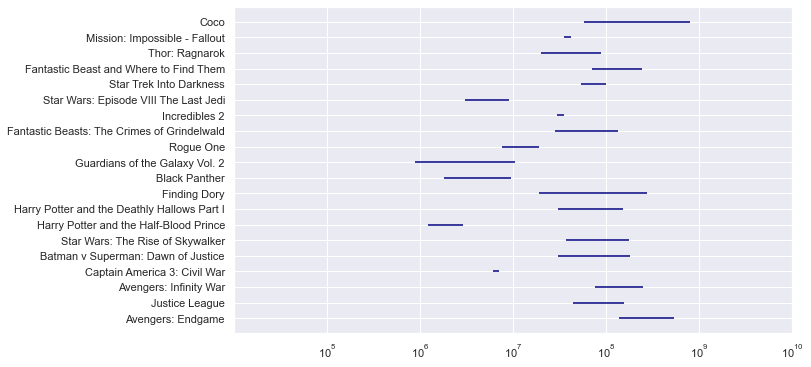

In [36]:
plt.xscale('log')
plt.xlim(10000,10000000000)
plt.xticks([1e5,1e6, 1e7, 1e8, 1e9, 1e10])
sns.set_style("white")

budget = base.sort_values("Budget", ascending = False).iloc[0:20]


lollipop = plt.hlines(budget["Movie"], 
          xmin=base["Budget"], 
          xmax=base['Revenue'],
          color = "navy",
          )

In [37]:
base.sort_values("Budget", ascending= False).head(20)

,ID,Movie,Year,Rating,Watched,Cinema,Vote Average,Vote Count,Runtime,Genres,Budget,Revenue,Overview,Profit
241,299534,Avengers: Endgame,2019,4,2019-04-21,False,4.15,14617,181,Adventure|SciFi|Action,356000000.0,2.797801e+09,After the devastating events of Avengers: Infi...,2.441801e+09
175,141052,Justice League,2017,3,2017-11-16,True,3.10,9475,120,Action|Adventure|Fantasy|SciFi,300000000.0,6.579243e+08,Fuelled by his restored faith in humanity and ...,3.579243e+08
198,299536,Avengers: Infinity War,2018,4,2018-04-22,True,4.15,19334,149,Adventure|Action|SciFi,300000000.0,2.046240e+09,As the Avengers and their allies have continue...,1.746240e+09
45,271110,Captain America 3: Civil War,2016,4,2016-04-28,True,3.70,16640,147,Adventure|Action|SciFi,250000000.0,1.153296e+09,"Following the events of Age of Ultron, the col...",9.032963e+08
35,209112,Batman v Superman: Dawn of Justice,2016,3,2016-03-24,True,2.95,13735,151,Action|Adventure|Fantasy,250000000.0,8.736349e+08,Fearing the actions of a god-like Super Hero l...,6.236349e+08
252,181812,Star Wars: The Rise of Skywalker,2019,3,2019-12-26,True,3.30,5447,142,Action|Adventure|SciFi,250000000.0,1.074144e+09,The surviving Resistance faces the First Order...,8.241442e+08
116,767,Harry Potter and the Half-Blood Prince,2009,4,2016-11-27,False,3.85,13095,153,Adventure|Fantasy,250000000.0,9.339592e+08,"As Harry begins his sixth year at Hogwarts, he...",6.839592e+08
117,12444,Harry Potter and the Deathly Hallows Part I,2010,4,2016-12-11,True,3.90,13205,146,Adventure|Fantasy,250000000.0,9.543059e+08,"Harry, Ron and Hermione walk away from their l...",7.043059e+08
76,127380,Finding Dory,2016,4,2016-07-03,True,3.50,9178,97,Adventure|Animation|Comedy|Family,200000000.0,1.028571e+09,Dory is reunited with her friends Nemo and Mar...,8.285709e+08
188,284054,Black Panther,2018,3,2018-03-13,True,3.70,15633,134,Action|Adventure|Fantasy|SciFi,200000000.0,1.346739e+09,King T'Challa returns home from America to the...,1.146739e+09


# Relation between Year and Revenue

* Melhorar o hue (eixo)

(1940.0, 2020.0)

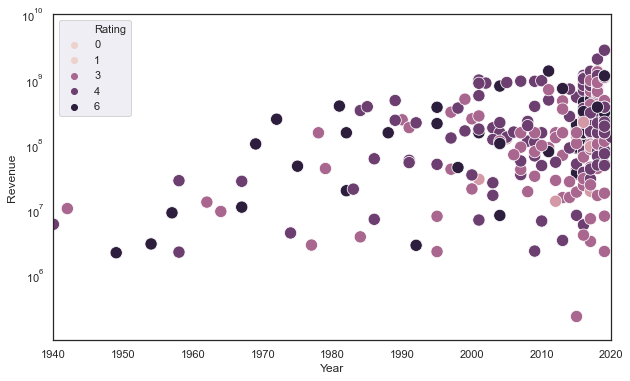

In [38]:
plt.yscale("log")
sns.set_context("notebook", font_scale=1.2)
sns.set(rc = {"figure.figsize":(12,8)})


# sns.scatterplot(data = base, 
#                 x = "Year", 
#                 y = "Budget",
#                 alpha=.6,
#                 color = "darkviolet",
#                 s = 150,
#                 marker = "X")

sns.scatterplot(data = base, 
                x = "Year", 
                y = "Revenue",
                alpha=1,
                color = "navy",
                s = 150,
                hue = "Rating"
                )


plt.ylim(100000,10000000000)
plt.yticks([1e6, 1e7, 1e8, 1e9, 1e10])
plt.xlim(1940,2020, 10)


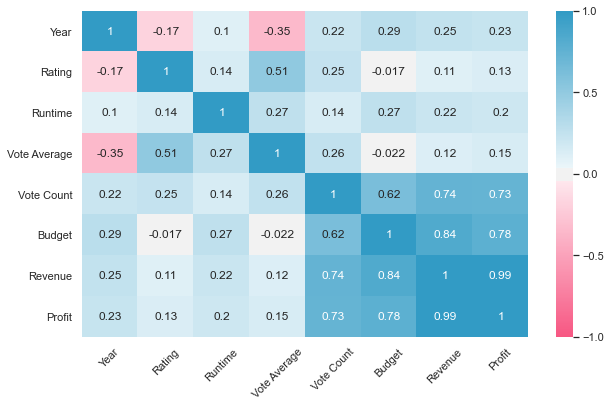

In [39]:
#mask = np.triu(base.corr())
values = base[["Year", "Rating","Runtime", "Vote Average", "Vote Count", "Budget", "Revenue", "Profit"]]
sns.set(rc={'figure.figsize':(10,6)})

#creating the colormap
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)


sns.heatmap(values.corr(), 
            annot = True, 
            vmin=-1, vmax=1, center= 0, 
            cmap= cmap,
            cbar_kws = {"ticks":[-1, -.5,0,.5,1]}
            )
            
plt.xticks(rotation = 45, ha = "center")


plt.savefig("Graphs/Correlation Heatmap")

0.0606277661220886
[0.57090138]


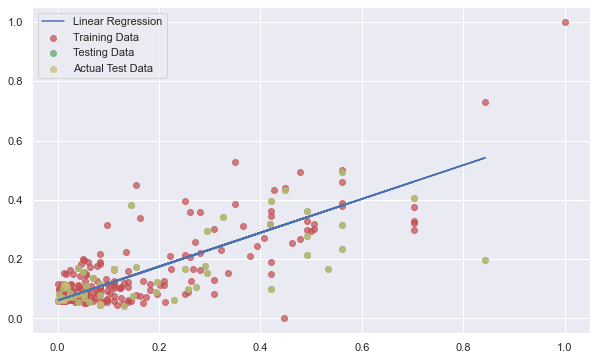

In [40]:
# plt.xscale('log')
# plt.yscale('log')
# plt.xlim(100000,10000000000)
# plt.xticks([1e6, 1e7, 1e8, 1e9, 1e10])
# plt.ylim(100000,10000000000)
# plt.yticks([1e5,1e6, 1e7, 1e8, 1e9, 1e10])

# ax = sns.scatterplot(x=base['Revenue'], y=base['Profit'])  
# It's necesary to split the data into train and test to a suprevised learning. First the model is train using a speciffic part of data and after the model will be testing in the remain data
#If the size of samples was not specify, the default size is 25% of the data however the best size is 80:20


min_max_scaler = preprocessing.MinMaxScaler()

base[['Budget','Profit']] = min_max_scaler.fit_transform(base[['Budget','Profit']])


X_train, X_test, y_train, y_test = train_test_split(base.Budget, base.Profit, train_size = 0.8, test_size = 0.2)



# Ploting the train and test data
plt.scatter(X_train,y_train, label = "Training Data", color = "r", alpha= .7)
plt.scatter(X_test,y_test, label = "Testing Data", color = "g", alpha= .7)
plt.legend()

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

#The LinearRegression() model perform all the math involves to build the linear regression line
regressor = LinearRegression()
#We fit the data to the Linear Regression Model
regressor.fit(X_train, y_train)


#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)
#The result of slop equal to 0.85 means that every single change in the profit, the Budget changes 85%


#Perform some predictor to test the accuracy of the model. For this, we use the test data
y_pred = regressor.predict(X_test)


plt.plot(X_test,y_pred,label = "Linear Regression", color = "b")
plt.scatter(X_test,y_test, label = "Actual Test Data", color = "y", alpha=.7)
plt.legend()


In [41]:
# Rsquare ellucidate how the model explain the values (0 to 1)
#y_test = data given to the model (true)
#y_pred = values given by the model (not certally true- depends how good is the model)

r2_score(y_test,y_pred)


0.3682365575524177

In [42]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
151,0.083786,0.090603
204,0.176605,0.227039
170,0.100370,0.300874
275,0.168367,0.204567
174,0.071351,0.077762
16,0.123816,0.172465
10,0.061935,0.061515
59,0.155687,0.088998
144,0.317744,0.299269
94,0.102871,0.066527


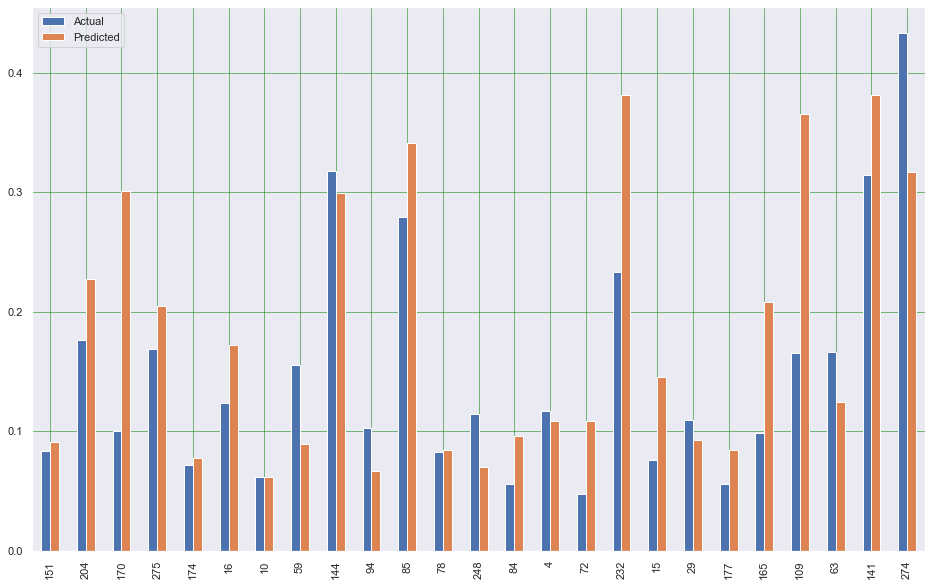

In [43]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()